In [2]:
# 📦 1. Import des bibliothèques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 📂 2. Charger les données
df = pd.read_csv("admission_des_patients.csv")

# ✅ 3. Création de la colonne 'Revisited'
df['Revisited'] = df['subject_id'].map(df['subject_id'].value_counts() > 1).astype(int)

# 🧼 4. Sélection des colonnes utiles pour la prédiction
features = [
    "gender", "HeightInMeters", "WeightInKilograms", "BMI",
    "SmokerStatus", "AlcoholDrinkers", "AdmissionYear", "AdmissionDayOfWeek"
]

df = df[features + ["Revisited"]]

# 🧽 5. Nettoyage des données
# Remplacer les virgules par des points et convertir en float
df["HeightInMeters"] = df["HeightInMeters"].str.replace(",", ".").astype(float)
df["WeightInKilograms"] = df["WeightInKilograms"].str.replace(",", ".").astype(float)
df["BMI"] = df["BMI"].str.replace(",", ".").astype(float)

# Remplacer les valeurs manquantes par la moyenne ou une valeur constante
df = df.dropna()

# 🔢 6. Encodage des variables catégorielles
label_cols = ["gender", "SmokerStatus"]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ⚖️ 7. Séparation des données
X = df.drop("Revisited", axis=1)
y = df["Revisited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 8. Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 9. Modélisation avec KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 🧪 10. Prédiction et évaluation
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))




Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.86      0.67      0.75         9

    accuracy                           0.85        26
   macro avg       0.85      0.80      0.82        26
weighted avg       0.85      0.85      0.84        26



In [3]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 📂 Charger les données
df = pd.read_csv("admission_des_patients.csv")

# ✅ Ajouter la colonne 'Revisited'
df['Revisited'] = df['subject_id'].map(df['subject_id'].value_counts() > 1).astype(int)

# 🧼 Nettoyage des colonnes numériques
df["HeightInMeters"] = df["HeightInMeters"].astype(str).str.replace(",", ".").astype(float)
df["WeightInKilograms"] = df["WeightInKilograms"].astype(str).str.replace(",", ".").astype(float)
df["BMI"] = df["BMI"].astype(str).str.replace(",", ".").astype(float)

# 🧽 Sélection des colonnes
features = [
    "gender", "HeightInMeters", "WeightInKilograms", "BMI",
    "SmokerStatus", "AlcoholDrinkers", "AdmissionYear", "AdmissionDayOfWeek"
]
df = df[features + ["Revisited"]].dropna()

# 🔢 Encodage des colonnes catégorielles
label_encoders = {}
for col in ["gender", "SmokerStatus"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ⚖️ Séparation X / y
X = df.drop("Revisited", axis=1)
y = df["Revisited"]

# 📊 Split données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🌲 Modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 📈 Prédiction
y_pred = rf.predict(X_test_scaled)

# 🧾 Métriques
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("📋 Rapport de classification :\n", classification_report(y_test, y_pred))
print("📊 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# 🔮 Exemple de prédiction pour un nouveau patient
new_patient = pd.DataFrame([{
    "gender": label_encoders["gender"].transform(["F"])[0],
    "HeightInMeters": 1.70,
    "WeightInKilograms": 68,
    "BMI": 23.5,
    "SmokerStatus": label_encoders["SmokerStatus"].transform(["Never smoked"])[0],
    "AlcoholDrinkers": 0,
    "AdmissionYear": 2165,
    "AdmissionDayOfWeek": 2
}])

new_patient_scaled = scaler.transform(new_patient)
revisit_pred = rf.predict(new_patient_scaled)
print("🔮 Revisitera ?", "Oui" if revisit_pred[0] == 1 else "Non")


✅ Accuracy : 0.8076923076923077
📋 Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.70      0.78      0.74         9

    accuracy                           0.81        26
   macro avg       0.79      0.80      0.79        26
weighted avg       0.81      0.81      0.81        26

📊 Matrice de confusion :
 [[14  3]
 [ 2  7]]
🔮 Revisitera ? Non


In [4]:
# 📦 Imports
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 📊 Grille des hyperparamètres
param_grid_knn = {
    'n_neighbors': list(range(1, 21)),       # nombre de voisins
    'weights': ['uniform', 'distance'],     # pondération
    'p': [1, 2]                              # 1 = Manhattan, 2 = Euclidean
}

# 🤖 Modèle KNN de base
knn_model = KNeighborsClassifier()

# 🔍 GridSearch avec validation croisée (5 folds)
grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # utilise tous les cœurs
    verbose=1
)

# 🚀 Entraînement sur les données normalisées
grid_search_knn.fit(X_train_scaled, y_train)

# 🏆 Meilleurs hyperparamètres
print("✅ Meilleurs paramètres :", grid_search_knn.best_params_)
print("📈 Meilleure accuracy (CV) :", grid_search_knn.best_score_)

# 📊 Évaluation sur les données de test
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("🎯 Accuracy sur le test :", accuracy_score(y_test, y_pred_knn))
print("📋 Rapport de classification :\n", classification_report(y_test, y_pred_knn))
print("📊 Matrice de confusion :\n", confusion_matrix(y_test, y_pred_knn))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
✅ Meilleurs paramètres : {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
📈 Meilleure accuracy (CV) : 0.8747619047619046
🎯 Accuracy sur le test : 0.8461538461538461
📋 Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.78      0.78      0.78         9

    accuracy                           0.85        26
   macro avg       0.83      0.83      0.83        26
weighted avg       0.85      0.85      0.85        26

📊 Matrice de confusion :
 [[15  2]
 [ 2  7]]


In [5]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# 📂 Chargement des données
df = pd.read_csv("admission_des_patients.csv")

# ✅ Création de la variable cible 'Revisited'
df['Revisited'] = df['subject_id'].map(df['subject_id'].value_counts() > 1).astype(int)

# 🧼 Nettoyage des colonnes numériques
df["HeightInMeters"] = df["HeightInMeters"].astype(str).str.replace(",", ".").astype(float)
df["WeightInKilograms"] = df["WeightInKilograms"].astype(str).str.replace(",", ".").astype(float)
df["BMI"] = df["BMI"].astype(str).str.replace(",", ".").astype(float)

# 🧽 Préparation des données
features = [
    "gender", "HeightInMeters", "WeightInKilograms", "BMI",
    "SmokerStatus", "AlcoholDrinkers", "AdmissionYear", "AdmissionDayOfWeek"
]
df = df[features + ["Revisited"]].dropna()

# 🔢 Encodage
label_encoders = {}
for col in ["gender", "SmokerStatus"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ⚖️ Séparation X/y
X = df.drop("Revisited", axis=1)
y = df["Revisited"]

# 🔍 Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ⚙️ Modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

# 📊 Cross Validation (k-fold = 5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')

# 📈 Résultat cross validation
print("✅ Scores validation croisée :", cv_scores)
print("📊 Moyenne :", cv_scores.mean())
print("📉 Écart-type :", cv_scores.std())

# 🧮 Analyse de la distribution des classes
print("🎯 Répartition des classes (biais de classe possible) :", Counter(y))

# 🔍 Détection du biais de classification
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(knn, X_scaled, y, cv=cv)

print("📋 Rapport de classification croisée :")
print(classification_report(y, y_pred_cv))

print("📊 Matrice de confusion :")
print(confusion_matrix(y, y_pred_cv))


✅ Scores validation croisée : [0.80769231 0.76923077 0.65384615 0.69230769 0.76      ]
📊 Moyenne : 0.7366153846153847
📉 Écart-type : 0.05563532996961915
🎯 Répartition des classes (biais de classe possible) : Counter({0: 86, 1: 43})
📋 Rapport de classification croisée :
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        86
           1       0.62      0.53      0.57        43

    accuracy                           0.74       129
   macro avg       0.70      0.69      0.69       129
weighted avg       0.73      0.74      0.73       129

📊 Matrice de confusion :
[[72 14]
 [20 23]]


In [6]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🎯 Meilleur modèle issu du GridSearch
best_knn_model = grid_search_knn.best_estimator_

# 📊 Validation croisée avec 5 folds (stratifiée pour respecter les classes)
cv_scores = cross_val_score(best_knn_model, X_scaled, y, cv=5, scoring='accuracy')
print("✅ Scores CV :", cv_scores)
print("📈 Moyenne :", cv_scores.mean())
print("📉 Écart-type :", cv_scores.std())

# 🔍 Prédictions croisées pour analyse du biais
y_pred_cv = cross_val_predict(best_knn_model, X_scaled, y, cv=5)

print("📋 Rapport de classification :")
print(classification_report(y, y_pred_cv))

print("📊 Matrice de confusion :")
print(confusion_matrix(y, y_pred_cv))


✅ Scores CV : [0.57692308 0.53846154 0.88461538 0.92307692 0.6       ]
📈 Moyenne : 0.7046153846153846
📉 Écart-type : 0.1643059636901291
📋 Rapport de classification :
              precision    recall  f1-score   support

           0       0.74      0.86      0.80        86
           1       0.59      0.40      0.47        43

    accuracy                           0.71       129
   macro avg       0.66      0.63      0.63       129
weighted avg       0.69      0.71      0.69       129

📊 Matrice de confusion :
[[74 12]
 [26 17]]


In [7]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 📂 Chargement des données
df = pd.read_csv("admission_des_patients.csv")
df['Revisited'] = df['subject_id'].map(df['subject_id'].value_counts() > 1).astype(int)

# 🧼 Nettoyage des colonnes numériques
df["HeightInMeters"] = df["HeightInMeters"].astype(str).str.replace(",", ".").astype(float)
df["WeightInKilograms"] = df["WeightInKilograms"].astype(str).str.replace(",", ".").astype(float)
df["BMI"] = df["BMI"].astype(str).str.replace(",", ".").astype(float)

# 🧽 Préparation
features = [
    "gender", "HeightInMeters", "WeightInKilograms", "BMI",
    "SmokerStatus", "AlcoholDrinkers", "AdmissionYear", "AdmissionDayOfWeek"
]
df = df[features + ["Revisited"]].dropna()

# 🔢 Encodage
label_encoders = {}
for col in ["gender", "SmokerStatus"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 🔎 Séparation X/y
X = df.drop("Revisited", axis=1)
y = df["Revisited"]

# ⚖️ Pipeline avec SMOTE + StandardScaler + RandomForest
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# 🔍 Grille de paramètres
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__class_weight': [None, 'balanced']
}

# 🧪 Validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🚀 Grid Search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# 📈 Meilleurs résultats
print("✅ Meilleurs paramètres :", grid_search.best_params_)
print("📊 Meilleure F1-score (CV) :", grid_search.best_score_)

# 🧾 Prédictions croisée sur tout le dataset
y_pred_cv = cross_val_predict(grid_search.best_estimator_, X, y, cv=cv)

# 📋 Rapport de performance
print("📋 Rapport de classification :")
print(classification_report(y, y_pred_cv))
print("📊 Matrice de confusion :")
print(confusion_matrix(y, y_pred_cv))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Meilleurs paramètres : {'rf__class_weight': None, 'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
📊 Meilleure F1-score (CV) : 0.7916755793226382
📋 Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        86
           1       0.77      0.84      0.80        43

    accuracy                           0.86       129
   macro avg       0.84      0.85      0.85       129
weighted avg       0.87      0.86      0.86       129

📊 Matrice de confusion :
[[75 11]
 [ 7 36]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


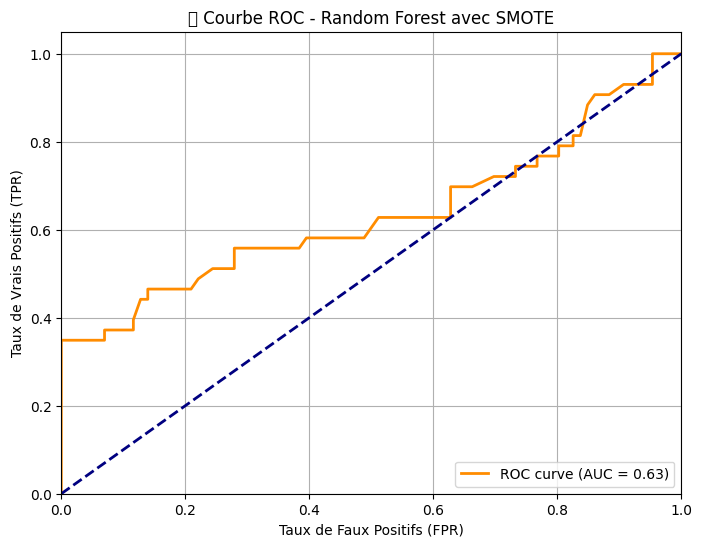

In [8]:
# 📦 Imports nécessaires
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ✅ On utilise le meilleur modèle du GridSearch
best_model = grid_search.best_estimator_

# 🔮 Obtenir les probabilités prédites (pour la classe 1)
y_proba = cross_val_predict(best_model, X, y, cv=5, method='predict_proba')[:, 1]

# 📈 Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y, y_proba)
auc_score = roc_auc_score(y, y_proba)

# 🎨 Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title("📊 Courbe ROC - Random Forest avec SMOTE")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


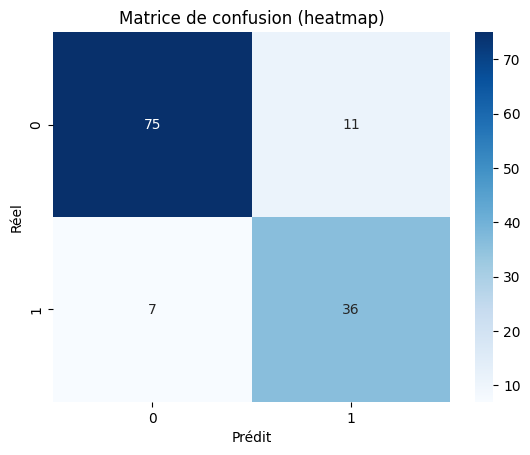

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# 🎨 Affichage de la matrice de confusion (heatmap)
sns.heatmap(confusion_matrix(y, y_pred_cv), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion (heatmap)")
plt.show()



In [10]:
pip install shap


<Figure size 640x480 with 0 Axes>

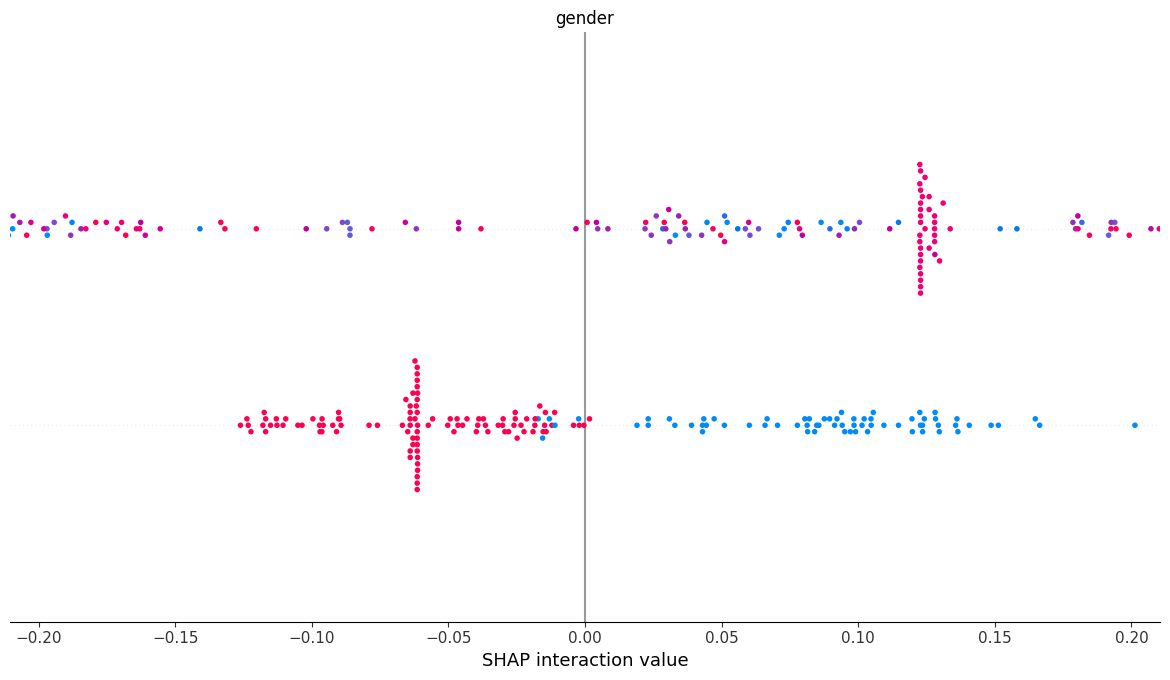

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [12]:
# 📦 Imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# 📂 Charger les données
df = pd.read_csv("admission_des_patients.csv")
df['Revisited'] = df['subject_id'].map(df['subject_id'].value_counts() > 1).astype(int)

# 🧼 Nettoyage
df["HeightInMeters"] = df["HeightInMeters"].astype(str).str.replace(",", ".").astype(float)
df["WeightInKilograms"] = df["WeightInKilograms"].astype(str).str.replace(",", ".").astype(float)
df["BMI"] = df["BMI"].astype(str).str.replace(",", ".").astype(float)

# 🔢 Encodage des variables catégorielles
for col in ["gender", "SmokerStatus"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 🔎 Sélection des features
features = [
    "gender", "HeightInMeters", "WeightInKilograms", "BMI",
    "SmokerStatus", "AlcoholDrinkers", "AdmissionYear", "AdmissionDayOfWeek"
]

X = df[features].dropna()
y = df.loc[X.index, "Revisited"]

# 🧪 SMOTE pour rééquilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# 🎯 Entraînement du modèle avec standardisation
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_resampled_scaled, y_resampled)

# ✅ Interprétation SHAP avec les données originales (non standardisées)
explainer = shap.Explainer(rf_model, X_resampled_scaled)  # base = modèle entraîné sur données scalées
shap_values = explainer(X_resampled_scaled, check_additivity=False)

# 📊 Résumé avec X non standardisé
shap.summary_plot(shap_values, X_resampled, feature_names=X.columns)


# 📊 Heatmap SHAP pour les 50 premiers patients
# 📊 Heatmap SHAP pour les 50 premiers patients (sans features_names)
# 🎯 Extraire uniquement les valeurs SHAP pour la classe 1 (revisite)
shap_values_class1 = shap_values[..., 1]

# 📊 Heatmap SHAP pour les 50 premiers patients, classe revisite
shap.plots.heatmap(shap_values_class1[:50], instance_order='importance')




In [19]:
import joblib  # 📦 pour la sauvegarde du modèle

# ... Ton code complet ici (jusqu'à l'entraînement avec grid_search.fit(...))

# ✅ Sauvegarde du meilleur modèle trouvé
joblib.dump(grid_search.best_estimator_, "modeleReadmission.pkl")

print("🎉 Modèle sauvegardé sous 'modeleReadmission.pkl'")


🎉 Modèle sauvegardé sous 'modeleReadmission.pkl'
